# 目录

# 1-读取数据

# 2-数据清洗

# 3-特征转换、衍生

# 4-特征筛选

# 5-对新数据进行预测

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

# 1-读取数据

In [4]:
test = pd.read_csv("data/test.csv")
test.shape

(1459, 80)

# 2-数据清洗

In [ ]:
# 引入'2-数据清洗'处理
%run 2-数据清洗.ipynb

# 1 数据类型修改
## 1.1 将数据设置为对应的类型

In [7]:
# @@处理@@
# 有序型变量转换
test = test.replace({    "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                           "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                           "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5,
                                           "Min2" : 6, "Min1" : 7, "Typ" : 8},
                           "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                           "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                           "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                           "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                           "Street" : {"Grvl" : 1, "Pave" : 2},
                           "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                         )

In [8]:
# @@处理@@
# MSSubClass： 出售中的房屋类型 应该是分类型
test['MSSubClass'] = test['MSSubClass'].astype(str)

# 年月
test['YearBuilt'] = test['YearBuilt'].astype(str)
test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

# 2 重复样本处理
## 2.1 删除重复样本

In [9]:
# @@处理@@
# 删除重复样本
test.drop_duplicates(inplace=True)

# 3 缺失值处理
## 3.1 行缺失处理

## 3.2 列缺失处理

### 3.2.1 删除缺失率超过40%的列¶

In [10]:
# @@处理@@
test.drop(labels=clear_nans_del_cols, axis=1, inplace=True)

### 3.2.2 统一填充缺失率少于1%的列
  - 连续型用中位数
  - 分类型用众数

In [11]:
# @@处理@@
#  - 连续型用中位数
#   - 分类型用众数
test[clear_nans_less1_cols_num] = test[clear_nans_less1_cols_num].fillna(clear_nans_less1_cols_num_median)
test[clear_nans_less1_cols_class] = test[clear_nans_less1_cols_class].fillna(clear_nans_less1_cols_class_mode)

### 3.2.3 相关性高的连续型变量业务填充

In [12]:
# @@处理@@
# GarageYrBlt 车库建成日期 GarageYrBlt	0.055479	0.053425	float64	0.486362
# 车库相关的五个变量GarageType、GarageYrBlt、GarageFinish、GarageQual、GarageCond是由于房子没有车库而缺失。
# GarageYrBlt为车库的年份，我们用房子的建造年份来替代
test.loc[test['GarageYrBlt'].isnull(), 'GarageYrBlt'] = test.loc[test['GarageYrBlt'].isnull(), 'YearBuilt']

# MasVnrArea 外墙装饰材料的面积，Na即认为面积为0 MasVnrArea	0.005479	0.010274	float64	0.477493
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

# LotFrontage 房子同街道之间的距离，Na即认为距离为0 LotFrontage	0.177397	0.155479	float64	0.351799
test['LotFrontage'] = test['LotFrontage'].fillna(0)

### 3.2.4 区分度高的分类型变量业务填充

In [13]:
# @@处理@@
# BsmtQual 地下室质量  BsmtQual	0.025342	0.030137	object	NaN	143.208288
# BsmtExposure、BsmtFinType2、BsmtQual、BsmtCond、BsmtFinType1五个变量是关于地下室的，都是由于房子没有地下室而缺失。
test['BsmtQual'].fillna('None', inplace=True)

# KitchenQual: String,  // 厨房质量, 这里用众数替换
test['KitchenQual'].fillna(clear_KitchenQual_mode, inplace=True)

### 3.2.5 统一填充剩余变量
 - 连续型用0
 - 分类型用None

In [14]:
# @@处理@@
remain_col = test.columns[test.isnull().sum(axis=0)>0]
clear_nans_remain_cols_num = test[remain_col].select_dtypes(include=[np.number]).columns
clear_nans_remain_cols_class = test[remain_col].select_dtypes(include=object).columns

test[clear_nans_remain_cols_num] = test[clear_nans_remain_cols_num].fillna(0)
test[clear_nans_remain_cols_class] = test[clear_nans_remain_cols_class].fillna('None')

In [15]:
# 查看缺失值是否处理完毕
test.isnull().sum(axis=0).sum()

0

# 4 连续型变量奇异值处理

## 4.1 y变量处理

## 4.2 重点变量处理

## 4.3 其余变量统一处理

In [18]:
# @@处理@@
# where(oklist, notokvalue)
test[clear_number_para] = test[clear_number_para].where(test[clear_number_para] < clear_number_q_para.loc['upper_outlier', :], 
                                clear_number_q_para.loc['upper_outlier', :], axis=1)

test[clear_number_para] = test[clear_number_para].where(test[clear_number_para] > clear_number_q_para.loc['lower_outlier', :], 
                                clear_number_q_para.loc['lower_outlier', :], axis=1)

# 3-特征转换、衍生

In [ ]:
%run 3-特征转换_衍生.ipynb

# 1 分类型变量
 
##  1.1 转换-分类型变量 重分组

In [22]:
# @@处理@@
test["SimpleNeighborhood"] = test.Neighborhood.replace({'IDOTRR': 'IDOTRR-BrDale' , 'BrDale': 'IDOTRR-BrDale',
                                                       'Blueste': 'Blueste-SWISU', 'SWISU': 'Blueste-SWISU' ,
                                                       'NPkVill': 'NPkVill-Mitchel', 'Mitchel': 'NPkVill-Mitchel'
                                                        })

##  1.2 转换-分类型变量 one-hot编码  

In [23]:
# @@处理@@
# 通过one-hot编码创建虚拟特性分类值
test_onehot = pd.get_dummies(test[featurego_cat_column], dtype = int)

# 2 连续型变量

## 2.1 衍生-连续型变量 非线性衍生

In [24]:
# @@处理@@
test["OverallQual-s2"] = test["OverallQual"] ** 2
test["OverallQual-s3"] = test["OverallQual"] ** 3
test["OverallQual-Sq"] = np.sqrt(test["OverallQual"])
test["GrLivArea-2"] = test["GrLivArea"] ** 2
test["GrLivArea-3"] = test["GrLivArea"] ** 3
test["GrLivArea-Sq"] = np.sqrt(test["GrLivArea"])

## 2.2 衍生-连续型变量 简单组合

In [25]:
# @@处理@@
# Total number of bathrooms
test["TotalBath"] = test["BsmtFullBath"] + (0.5 * test["BsmtHalfBath"]) + \
                     test["FullBath"] + (0.5 * test["HalfBath"])
# Total SF for house (incl. basement)
test["AllSF"] = test["GrLivArea"] + test["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
test["AllFlrsSF"] = test["1stFlrSF"] + test["2ndFlrSF"]
# Total SF for porch
test["AllPorchSF"] = test["OpenPorchSF"] + test["EnclosedPorch"] + \
                      test["3SsnPorch"] + test["ScreenPorch"]

## 2.3 转换-连续型变量 正态转换

In [26]:
# @@处理@@
test[featurego_skewed_features] = np.log1p(test[featurego_skewed_features])

## 2.4 转换-连续型变量 无量纲化转换

In [30]:
test_num = test.select_dtypes(include=[np.number])
test_num_minmax_array = featurego_min_max_scaler.fit_transform(test_num)

test_num_minmax = pd.DataFrame(
    np.round(test_num_minmax_array, 2),
    columns = [col + '_minmax' for col in test_num.columns],
    index = test.index
)

## 整合处理

In [31]:
# @@处理@@
test = pd.concat([test, test_onehot, test_num_minmax], axis=1)

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 598 entries, Id to AllPorchSF_minmax
dtypes: float64(97), int32(455), int64(19), object(27)
memory usage: 4.1+ MB


# 4-特征筛选

In [ ]:
%run 4-特征筛选.ipynb

# 5-对新数据进行预测

In [ ]:
%run 5-模型训练.ipynb

In [39]:
test_X = test[model_column]

In [40]:
test_ID = test['Id']

In [41]:
pred_y_ridge = np.expm1(model_ridge.predict(test_X))
pred_y_elasticNet = np.expm1(model_elasticNet.predict(test_X))
pred_y_averaged_models = np.expm1(model_averaged_models.predict(test_X))

In [42]:
sub1 = pd.DataFrame()
sub1['Id'] = test_ID
sub1['SalePrice'] = pred_y_ridge
sub1.to_csv('sub_ridge.csv',index=False)

In [43]:
sub2 = pd.DataFrame()
sub2['Id'] = test_ID
sub2['SalePrice'] = pred_y_elasticNet
sub2.to_csv('sub_elasticNet.csv',index=False)

In [45]:
sub3 = pd.DataFrame()
sub3['Id'] = test_ID
sub3['SalePrice'] = pred_y_averaged_models
sub3.to_csv('sub_averaged_models.csv',index=False)

# 提交结果

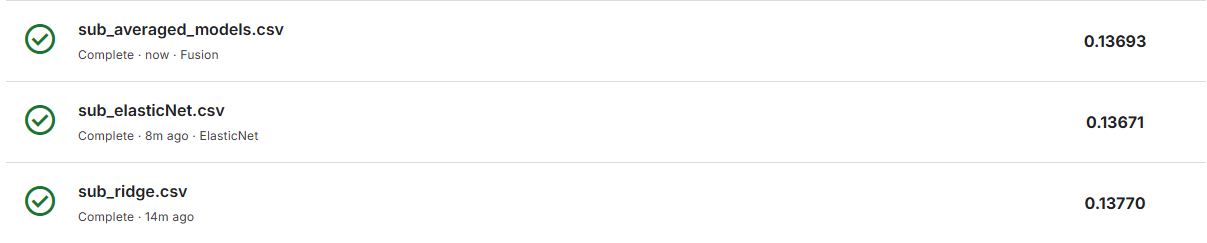

# 补充GBDT和Xgboost训练结果

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

gbdt = GradientBoostingRegressor(loss = 'squared_error', random_state = 42,
                                 learning_rate = 0.1, max_depth = 3,
                                 min_samples_leaf = 5, n_estimators = 100)
gbdt.fit(train_X, train_y)
pred_y_gbdt = np.expm1(gbdt.predict(test_X))
sub4 = pd.DataFrame()
sub4['Id'] = test_ID
sub4['SalePrice'] = pred_y_gbdt
sub4.to_csv('sub_GBDT.csv', index = False)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [58]:
xgb = XGBRegressor(
    objective = 'reg:squarederror', random_state = 42,
    colsample_bytree = 0.8, learning_rate = 0.08,
    max_depth = 3, min_child_weight = 2,
    n_estimators = 150, subsample = 0.8,
    verbosity = 0)
xgb.fit(train_X, train_y)
pred_y_xgb = np.expm1(xgb.predict(test_X))
sub5 = pd.DataFrame()
sub5['Id'] = test_ID
sub5['SalePrice'] = pred_y_xgb
sub5.to_csv('sub_Xgboost.csv', index = False)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None
